# Carnatic music Rhythm classification

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [32]:
os.getcwd()


'C:\\Users\\MY BOOK\\Downloads\\Carnatic music Rhythm classification'

In [33]:
df=pd.read_excel('CMRfullDataset.xlsx')

df

,UID,MBID of the recording,Name,Artist,Release+Volume,Lead Instrument Code,Taala,Raaga,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
0,10001,6fb02d72-120f-415a-bf46-cd455a61165c,05_Thunga_Theera_Virajam,Abhishek Raghuram,Gems Of Carnatic Music - Live In Concert 2006,V,0,salaga bhairavi,26,175,149,2.48,193,25
1,10002,3ba1767b-f6c3-43dc-856f-1df72863650f,1_Salamelae_-_Varnam,Alathur Brothers,Alathur Brothers,V,0,nattakurinji,16,253,237,3.95,368,46
2,10003,5769ea2f-aed4-4169-9a20-bae4cb733b8e,1-04_Shri_Visvanatham,Amritha Murali,December Season 2010/CD 1,V,0,chaturdasha ragamalika,54,406,352,5.87,481,61
3,10004,40ecccaf-46d9-42a3-a709-e5202a1e22ec,1_Vathapi,Aneesh Vidyashankar,Pure Expressions,L,0,hamsadhwani,43,553,510,8.50,825,104
4,10005,de94ed93-7399-47e3-aa8e-d77b49d94bd3,2_Jagadanandakaraka,Aneesh Vidyashankar,Pure Expressions,L,0,nattai,3,517,514,8.57,705,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13024,5d1e6f5e-a588-461a-afc4-4d42a68e0adb,10-01_Vaa_Velava,Sanjay Subrahmanyan,December Season 2010 - Concert 4/CD 2,V,3,tanarupi,61,316,255,4.25,397,133
172,13025,aa97b27e-4fd3-4130-865d-77a16ac59246,4_Amma_Ravamma,Sikkil Mala Chandrasekhar,Resonance Flute Concert,F,3,kalyani,815,1230,415,6.92,703,235
173,13026,bbee764d-7406-47ce-821a-a82030b89eca,2_Anupama_Gunambudhi,Sowmya,Bharat Sangeet Utsav,V,3,atana,69,198,129,2.15,223,75
174,13027,c5e32bf4-2cb1-47fc-a3fd-c855e0e2cd40,1-05_Paridanamiccite,Sumithra Vasudev,December Season 2010/CD 1,V,3,bilahari,3,268,265,4.42,487,163


In [34]:

X_train=df.drop('Taala',axis=1).values
y_train=df['Taala'].values
print(X_train.shape)
print(y_train.shape)

(176, 13)
(176,)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          176 non-null    int64  
 1   MBID of the recording        176 non-null    object 
 2   Name                         176 non-null    object 
 3   Artist                       176 non-null    object 
 4   Release+Volume               176 non-null    object 
 5   Lead Instrument Code         176 non-null    object 
 6   Taala                        176 non-null    int64  
 7   Raaga                        176 non-null    object 
 8   Excerpt Start Time (s)       176 non-null    int64  
 9   Excerpt End Time (s)         176 non-null    int64  
 10  Length of the excerpt (s)    176 non-null    int64  
 11  Length of the excerpt (min)  176 non-null    float64
 12  Number of annotated beats    176 non-null    int64  
 13  Number of samas     

In [36]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df.describe()

,UID,Taala,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,11330.295455,1.306818,180.585227,520.465909,339.880682,5.664602,509.244318,128.670455
std,1048.418817,1.051344,288.602631,395.776054,169.009729,2.816584,250.371592,77.264699
min,10001.000000,0.000000,1.000000,89.000000,86.000000,1.430000,158.000000,20.000000
25%,10044.750000,0.000000,6.750000,256.750000,221.750000,3.695000,327.250000,75.000000
50%,11038.500000,1.000000,33.500000,382.500000,303.500000,5.055000,457.500000,112.500000
75%,12032.250000,2.000000,260.750000,631.250000,432.500000,7.210000,635.000000,168.250000
max,13028.000000,3.000000,1389.000000,2213.000000,974.000000,16.230000,1346.000000,449.000000


In [37]:
# From both train and test data
df_train = df.drop(['MBID of the recording', 'Name','Artist','Release+Volume','Lead Instrument Code','Raaga'], axis = 1)

df_train = df_train.iloc[:,1:]


In [38]:
df_train.groupby('Taala').size()

Taala
0    50
1    50
2    48
3    28
dtype: int64

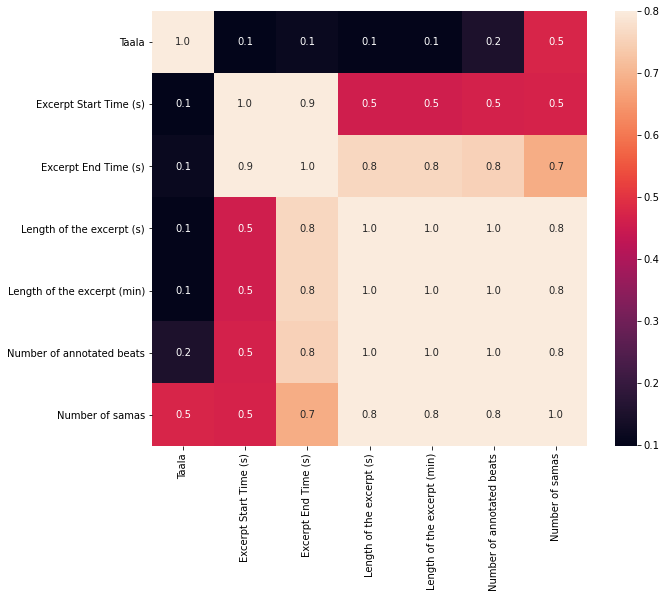

In [39]:
import seaborn as sns
size = 10
corrmat = df_train.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True, fmt='.1f');

In [40]:
data = df_train.iloc[:,:size]
data
# Get name of the columns
cols = data.columns

# Calculate the pearson correlation coefficients for all combinations
data_corr = data.corr()

# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []

In [41]:
data

,Taala,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
0,0,26,175,149,2.48,193,25
1,0,16,253,237,3.95,368,46
2,0,54,406,352,5.87,481,61
3,0,43,553,510,8.50,825,104
4,0,3,517,514,8.57,705,89
...,...,...,...,...,...,...,...
171,3,61,316,255,4.25,397,133
172,3,815,1230,415,6.92,703,235
173,3,69,198,129,2.15,223,75
174,3,3,268,265,4.42,487,163


In [42]:
data_corr

,Taala,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
Taala,1.000000,0.098202,0.115026,0.101670,0.101660,0.151630,0.474043
Excerpt Start Time (s),0.098202,1.000000,0.925241,0.459061,0.459085,0.467217,0.470812
Excerpt End Time (s),0.115026,0.925241,1.000000,0.761784,0.761802,0.750920,0.685998
Length of the excerpt (s),0.101670,0.459061,0.761784,1.000000,1.000000,0.960631,0.802461
Length of the excerpt (min),0.101660,0.459085,0.761802,1.000000,1.000000,0.960621,0.802477
Number of annotated beats,0.151630,0.467217,0.750920,0.960631,0.960621,1.000000,0.820652
Number of samas,0.474043,0.470812,0.685998,0.802461,0.802477,0.820652,1.000000


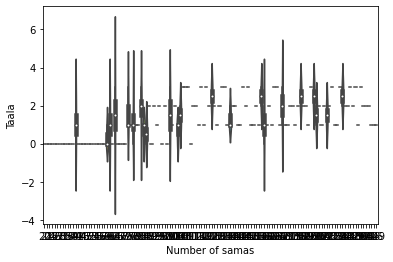

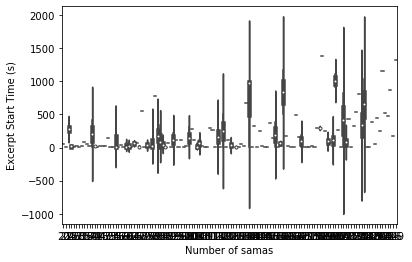

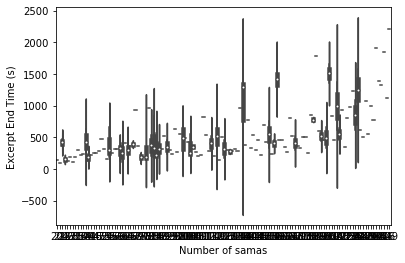

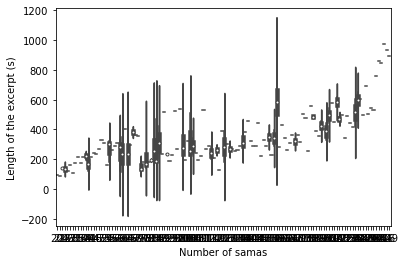

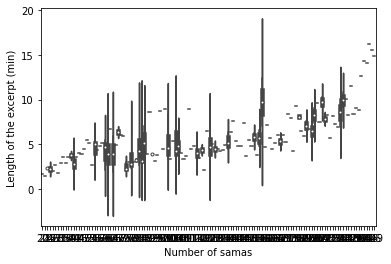

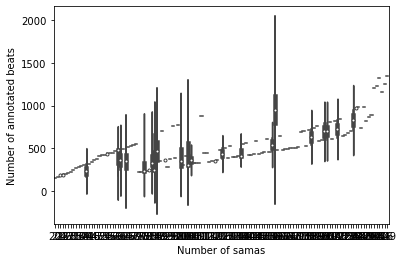

In [43]:

# A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
cols = df_train.columns
size = len(cols) - 1 # We don't need the target attribute
# x-axis has target attributes to distinguish between classes
x = cols[size]
y = cols[0:size]

for i in range(0, size):
    sns.violinplot(data=df_train, x=x, y=y[i])
    plt.show()

In [44]:
# Checking for data transformation (take only non-categorical values)
df_train.iloc[:,:10].skew()

Taala                          0.193339
Excerpt Start Time (s)         2.211848
Excerpt End Time (s)           1.803326
Length of the excerpt (s)      1.255063
Length of the excerpt (min)    1.254662
Number of annotated beats      1.139707
Number of samas                1.225992
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


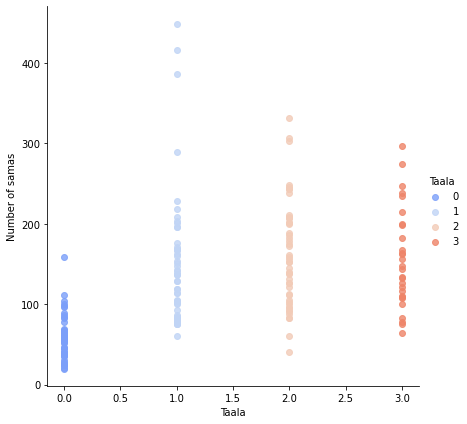

In [51]:
 sns.lmplot('Taala', 'Number of samas', data=df_train, hue='Taala', palette='coolwarm', size=6, aspect=1, fit_reg=False)